In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf 
import tensorflow.keras as K
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D,UpSampling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


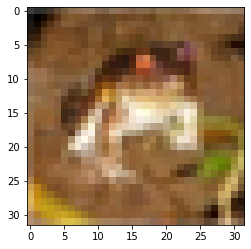

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#X_train = K.applications.vgg16.preprocess_input(x_train)
Y_train= K.utils.to_categorical(y_train, 10)

In [ ]:
#X_test= K.applications.vgg16.preprocess_input(x_test)
Y_test= K.utils.to_categorical(y_test, 10)

In [ ]:
cnn = K.applications.vgg16.VGG16(include_top=False,
                                 weights='imagenet',
                                 pooling='avg',
                                 input_shape=(32, 32, 3)
                                 )

In [ ]:
CNN= K.Sequential()
CNN.add(cnn)
CNN.add(Flatten())
CNN.add(Dense(512, activation=('relu'))) 
#CNN.add(Dropout(0.5))
#CNN.add(Dense(256, activation=('relu')))
CNN.add(BatchNormalization())
CNN.add(Dropout(0.5))
CNN.add(Dense(10, activation=('sigmoid')))

In [ ]:
from tensorflow.keras import optimizers

opt = optimizers.SGD(lr=0.001, momentum=0.9)
CNN.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
his = CNN.fit(x=x_train, y=Y_train,
        batch_size=64,
        validation_data=(x_test, Y_test),
        epochs=15, shuffle=True,
        verbose=1
        )

Epoch 1/15
782/782 [==============================] - 69s 84ms/step - loss: 0.9414 - accuracy: 0.6809 - val_loss: 0.7156 - val_accuracy: 0.7567
Epoch 2/15
782/782 [==============================] - 64s 82ms/step - loss: 0.5565 - accuracy: 0.8092 - val_loss: 0.6781 - val_accuracy: 0.7759
Epoch 3/15
782/782 [==============================] - 65s 83ms/step - loss: 0.4220 - accuracy: 0.8547 - val_loss: 0.7584 - val_accuracy: 0.7668
Epoch 4/15
782/782 [==============================] - 64s 82ms/step - loss: 0.3262 - accuracy: 0.8884 - val_loss: 0.5468 - val_accuracy: 0.8234
Epoch 5/15
782/782 [==============================] - 64s 82ms/step - loss: 0.2531 - accuracy: 0.9123 - val_loss: 0.5463 - val_accuracy: 0.8306
Epoch 6/15
782/782 [==============================] - 64s 82ms/step - loss: 0.1831 - accuracy: 0.9367 - val_loss: 0.5644 - val_accuracy: 0.8322
Epoch 7/15
782/782 [==============================] - 64s 82ms/step - loss: 0.1232 - accuracy: 0.9593 - val_loss: 0.7244 - val_accuracy:

In [ ]:
CNN.evaluate(x_test,Y_test)

313/313 [==============================] - 7s 20ms/step - loss: 0.5679 - accuracy: 0.8744


[0.5679095387458801, 0.8744000196456909]

Text(0, 0.5, 'Accuracy')

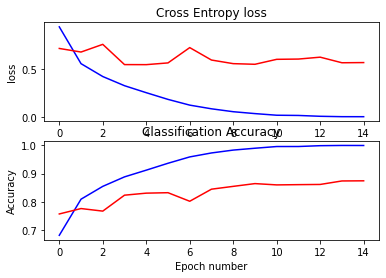

In [ ]:
plt.subplot(211)
plt.plot(his.history['loss'],color = 'blue',label = 'train')
plt.plot(his.history['val_loss'],color = 'red',label = 'test')
plt.title('Cross Entropy loss')
plt.xlabel('Epoch number')
plt.ylabel('loss')

plt.subplot(212)
plt.plot(his.history['accuracy'],color = 'blue',label = 'train')
plt.plot(his.history['val_accuracy'],color = 'red',label = 'test')
plt.title('Classification Accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')

